In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Sem2\\ISD\\Assignment\\heart.csv")


In [2]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,322.000000,322.000000,322.000000,317.000000,318.000000,322.000000,322.000000,315.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,54.295031,0.677019,1.000000,131.763407,246.194969,0.149068,0.540373,150.152381,0.313665,1.049379,1.403727,0.686335,2.295031,0.571429
std,9.012793,0.468343,1.041207,17.411008,51.712866,0.356710,0.523513,22.901109,0.464704,1.147698,0.625311,1.006706,0.608793,0.495642
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       322 non-null    int64  
 1   sex       322 non-null    int64  
 2   cp        322 non-null    int64  
 3   trestbps  317 non-null    float64
 4   chol      318 non-null    float64
 5   fbs       322 non-null    int64  
 6   restecg   322 non-null    int64  
 7   thalach   315 non-null    float64
 8   exang     322 non-null    int64  
 9   oldpeak   322 non-null    float64
 10  slope     322 non-null    int64  
 11  ca        322 non-null    int64  
 12  thal      322 non-null    int64  
 13  target    322 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.3 KB


For all the independent variables given, state the discrete variables and their types (For
example Nominal/Ordinal …).
//// Binary
sex (0 = female; 1 = male)
fbs: Fasting blood sugar > 120 mg/dl
exang: Exercise induced angina (0 = no; 1 = yes)
//// Categorical
cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)
restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)
slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)
thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)
/// Ordinal
ca: number of major vessels (0-3) colored by flourosopy
//// Numeric
age
oldpeak: ST depression induced by exercise relative to rest
trestbps: Resting blood pressure
chol: Serum cholestoral in mg/dl
thalach: Maximum heart rate achieved during thalium stress test       


In [4]:
pd.isnull(df).sum() > 0

age         False
sex         False
cp          False
trestbps     True
chol         True
fbs         False
restecg     False
thalach      True
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
df['trestbps'].fillna((df['trestbps'].mean()), inplace=True)
df['chol'].fillna((df['chol'].mean()), inplace=True)
df['thalach'].fillna((df['thalach'].mean()), inplace=True)
pd.isnull(df).sum() > 0

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# Understanding the Data

--> Correlation Matrix

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

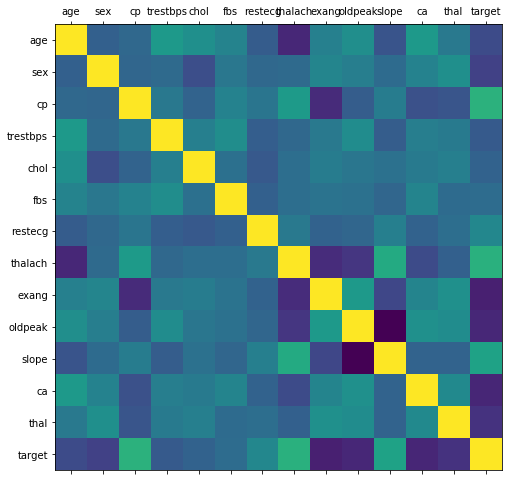

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10,8
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar


As per the above correlation matrix there is no single feature that has very high correlation with our target variables.
Some features have negative correlation with target variable and some have positive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029D2CBCD888>,
      dtype=object)

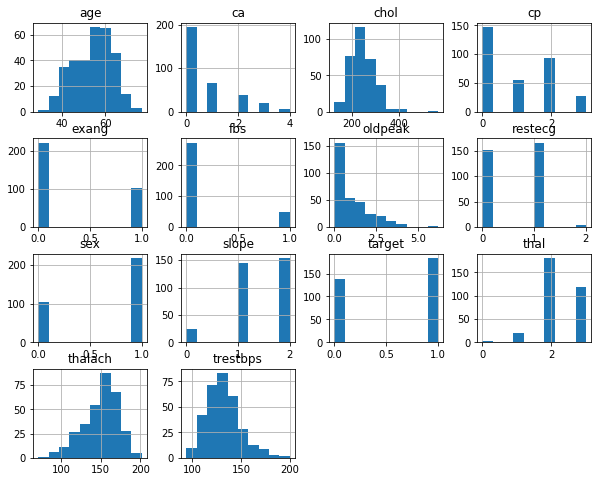

In [7]:
df.hist()

Text(0, 0.5, 'Count')

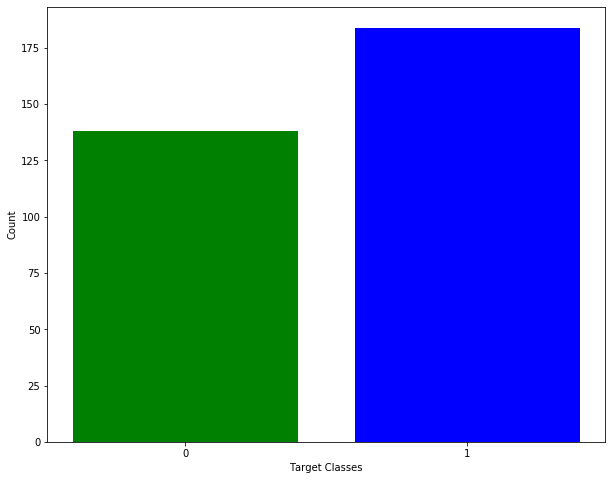

In [8]:
plt.bar(df['target'].unique(),df['target'].value_counts(), color = ['blue','green'])
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')


# Data Processing

To convert categorical data into numerical we need to break categorical column into dummy columns with 1 and 0 value

In [9]:
df = pd.get_dummies(df, columns= ['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardSacler = StandardScaler()
col_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[col_to_scale] = standardSacler.fit_transform(df[col_to_scale])

# Machine Learning

### Que 8. What will be your criteria to select the classification algorithm?
As the data is linear data, based on this we are going to utililize basic ML alogs. After analysis and based on accuracy best one will be choosen.
Assuming: 67% of data as for trainig and 33% for testing 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
y =df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 0)


In [12]:
svc_score = []
kernals = ['linear','poly','rbf','sigmoid']

for i in range(len(kernals)):
    svc_classifier = SVC(kernel = kernals[i])
    svc_classifier.fit(X_train,y_train)
    svc_score.append(svc_classifier.score(X_test,y_test))

In [13]:
svc_score

[0.8130841121495327,
 0.7850467289719626,
 0.7850467289719626,
 0.8130841121495327]

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernals')

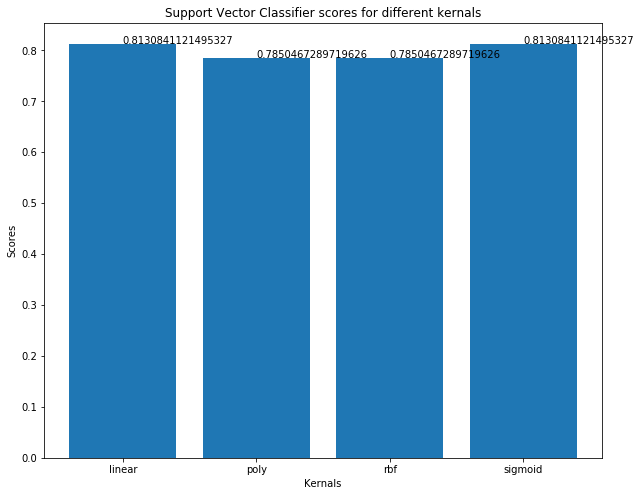

In [14]:
plt.bar(kernals, svc_score)
for i in range(len(kernals)):
    plt.text(i , svc_score[i], svc_score[i])
plt.xlabel('Kernals')
plt.ylabel('Scores')
plt.title("Support Vector Classifier scores for different kernals")

The linear kernal performed the best for this dataset and achived a score of 81%

In [15]:
knn_score = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train,y_train)
    knn_score.append(knn_classifier.score(X_test,y_test))

In [16]:
knn_score

[0.7289719626168224,
 0.794392523364486,
 0.794392523364486,
 0.8130841121495327,
 0.8037383177570093,
 0.8037383177570093,
 0.822429906542056,
 0.8130841121495327,
 0.8037383177570093,
 0.8130841121495327,
 0.8037383177570093,
 0.8037383177570093,
 0.8037383177570093,
 0.8130841121495327,
 0.7850467289719626,
 0.794392523364486,
 0.794392523364486,
 0.8037383177570093,
 0.7850467289719626,
 0.7850467289719626]

Text(0.5, 1.0, 'KNN Classifier score for different K values')

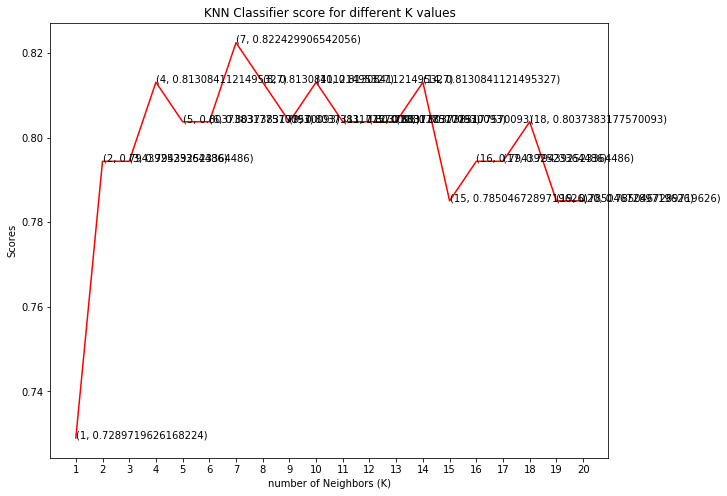

In [17]:
plt.plot([k for k in range(1,21)], knn_score, color = 'red')
for i in range (1,21):
    plt.text(i, knn_score[i-1],(i, knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('KNN Classifier score for different K values')
    

As we see we  achieved the maximum score of 82 % when the number of neighbors was chosen to be 7

In [18]:
dt_score = []
for i in range(1, len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train,y_train)
    dt_score.append(dt_classifier.score(X_test,y_test))

In [19]:
dt_score

[0.719626168224299,
 0.7383177570093458,
 0.7102803738317757,
 0.7663551401869159,
 0.7476635514018691,
 0.7009345794392523,
 0.7570093457943925,
 0.7289719626168224,
 0.7476635514018691,
 0.7102803738317757,
 0.7383177570093458,
 0.6822429906542056,
 0.7383177570093458,
 0.7009345794392523,
 0.7476635514018691,
 0.6822429906542056,
 0.7383177570093458,
 0.7289719626168224,
 0.719626168224299,
 0.7663551401869159,
 0.7289719626168224,
 0.7009345794392523,
 0.7009345794392523,
 0.719626168224299,
 0.7383177570093458,
 0.7102803738317757,
 0.6915887850467289,
 0.7009345794392523,
 0.7009345794392523,
 0.7009345794392523]

Text(0.5, 1.0, 'Decision Tree Classifier score for different number of maximum feature')

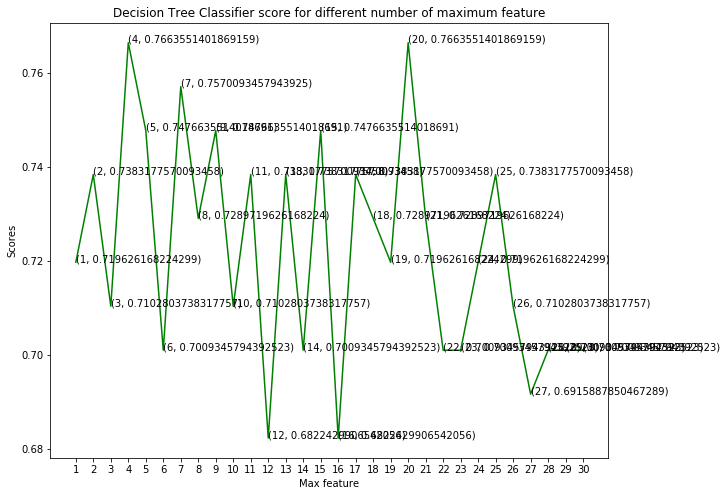

In [20]:
plt.plot([i for i in range(1,len(X.columns)+1)], dt_score, color = 'green')
for i in range (1,len(X.columns)+1):
    plt.text(i, dt_score[i-1],(i, dt_score[i-1]))
plt.xticks([i for i in range(1,len(X.columns)+1)])
plt.xlabel('Max feature')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier score for different number of maximum feature')

From above graph, we can clearly see that the maximum score is 76% and is achived for maximum features being selected to be either 4 or 20.

In [21]:
rf_score = []
estimators = [10,100,200,500,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train,y_train)
    rf_score.append(rf_classifier.score(X_test,y_test))

In [22]:
rf_score

[0.7850467289719626,
 0.7663551401869159,
 0.7757009345794392,
 0.7757009345794392,
 0.7850467289719626]

Text(0.5, 1.0, 'Random Forest Classifier score for different number estimators')

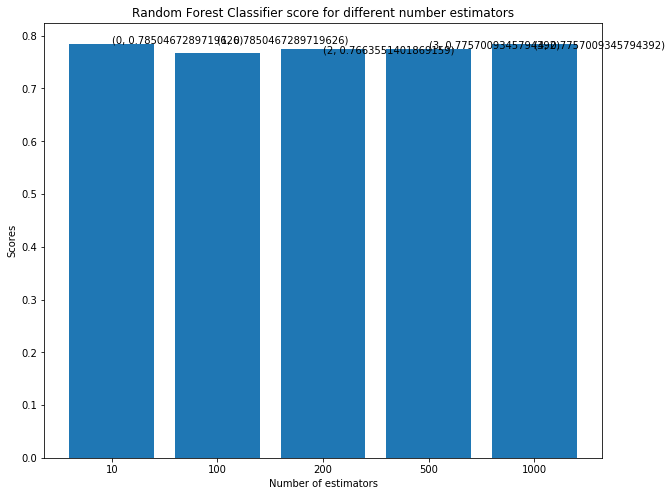

In [23]:
plt.bar([i for i in range(len(estimators))], rf_score)
for i in range(len(estimators)):
    plt.text(i, rf_score[i-1],(i, rf_score[i-1]))
plt.xticks(ticks= [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier score for different number estimators')

We can see maximum score of 78% was achieved for both 10 and 100.

# Conclusion


4 models were trained and tested with maximum score as follows:
    1.Support Vector Classifier : 81%
    2.KNN Classifier            : 82%:
    3.Decision Tree Classifier  : 76%
    4.Random Forest Classifier  : 78%
   
   
KNN-Classifier scored the best score of 82% with 7 neighbors.